In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#DATA UNDERSTANDING

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load dataset
train_df=pd.read_csv('/content/drive/MyDrive/Zenius/FinPro/dataset/application_train.csv')
train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#load dataset
test_df=pd.read_csv('/content/drive/MyDrive/Zenius/FinPro/dataset/application_test.csv')
test_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#show data shape application train and application test
print('Training data shape: {}, Testing data shape: {}'.format(train_df.shape,test_df.shape))

Training data shape: (307511, 122), Testing data shape: (48744, 121)


In [ ]:
#show information dataframe
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [ ]:
#menggolongkan data numerik dan categorical
cats=[i for i in train_df.columns if train_df[i].dtypes == 'object' and i not in ['SK_ID_CURR', 'TARGET']]
nums=[i for i in train_df.columns if train_df[i].dtypes != 'object']

In [ ]:
#show statistik data numerik
train_df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


In [ ]:
#show statistik data kategorika
train_df[cats].describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


In [ ]:
train = train_df.copy()
decode_map = {0: "No Payment Difficulties", 1: "Payment Difficulties"}
def decode_sentiment(label):
    return decode_map[int(label)]

train['TARGET'] = train['TARGET'].apply(lambda x: decode_sentiment(x))

In [ ]:
#lihat persentase target
grp = train['TARGET'].value_counts(normalize=True)
grp.reset_index().style.background_gradient(cmap='Greys')

,index,TARGET
0,No Payment Difficulties,0.919271
1,Payment Difficulties,0.080729


In [ ]:
# lihat jumlah value pada target
train_df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

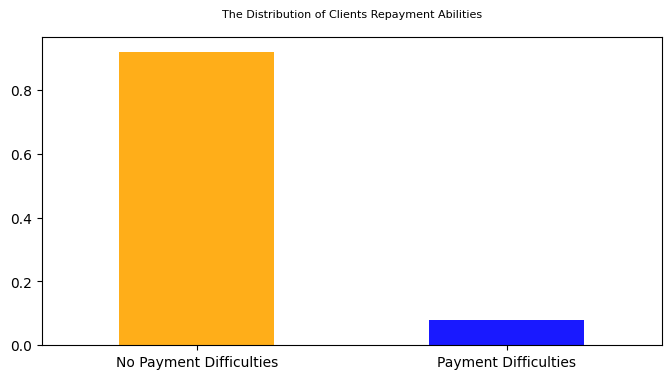

In [ ]:
# lihat distribusi dari target
fig = plt.figure(figsize = (8,4))
grp.plot(kind='bar', color= ['orange','blue'], alpha = 0.9, rot=0)
plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=8)
plt.show()

dari analisis diatas diketahui bahwa :
- terdapat 91% yang tidak memiliki kesulitan dalam membayar pinjaman
- terdapat 8,7% yang memiliki kesullitan dalam membayar pinjaman
- adanya indikasi bahwa data tidak seimbang


In [ ]:
#Cek korelasi masing-masing variabel
corr_vars = train_df.corr()['TARGET'].sort_values()
positive_corr = corr_vars[corr_vars > 0].sort_values(ascending=False).drop('TARGET')[:20]
negative_corr = corr_vars[corr_vars < 0].sort_values(ascending=True)[:20]

In [ ]:
print(('Positive Correlation:\n'),positive_corr)
print(('Negative Correlation:\n'),negative_corr)

Positive Correlation:
 DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187
CNT_FAM_MEMBERS                0.009308
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
Name: TARGET, dtype: float64
Negative Correlation:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMP

dari hasil tersebut diketahui bahwa Days_Birth dan EXT_Source3 memiliki korelasi yang tinggi terhadap Target

In [ ]:
# cek statistics sumary column ammount
pd.options.display.float_format = '{:.2f}'.format
train_df[["AMT_INCOME_TOTAL", "AMT_ANNUITY", "AMT_CREDIT", "AMT_GOODS_PRICE"]].describe()

,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE
count,307511.00,307499.00,307511.00,307233.00
mean,168797.92,27108.57,599026.00,538396.21
std,237123.15,14493.74,402490.78,369446.46
min,25650.00,1615.50,45000.00,40500.00
25%,112500.00,16524.00,270000.00,238500.00
50%,147150.00,24903.00,513531.00,450000.00
75%,202500.00,34596.00,808650.00,679500.00
max,117000000.00,258025.50,4050000.00,4050000.00


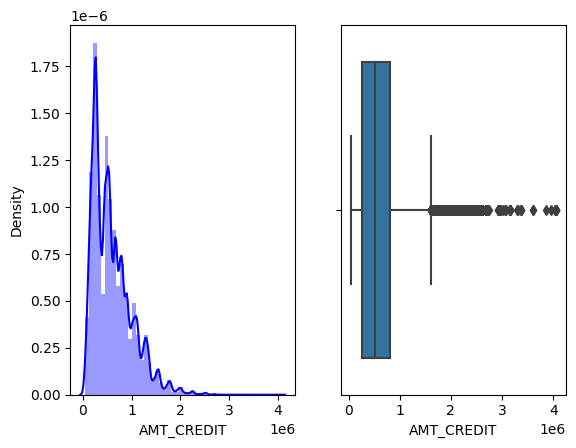

In [ ]:
# lihat distribusi ammount credit
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.distplot(train_df["AMT_CREDIT"], color = 'blue', ax = ax1)
sns.boxplot(x=train_df["AMT_CREDIT"], ax = ax2)
plt.show()

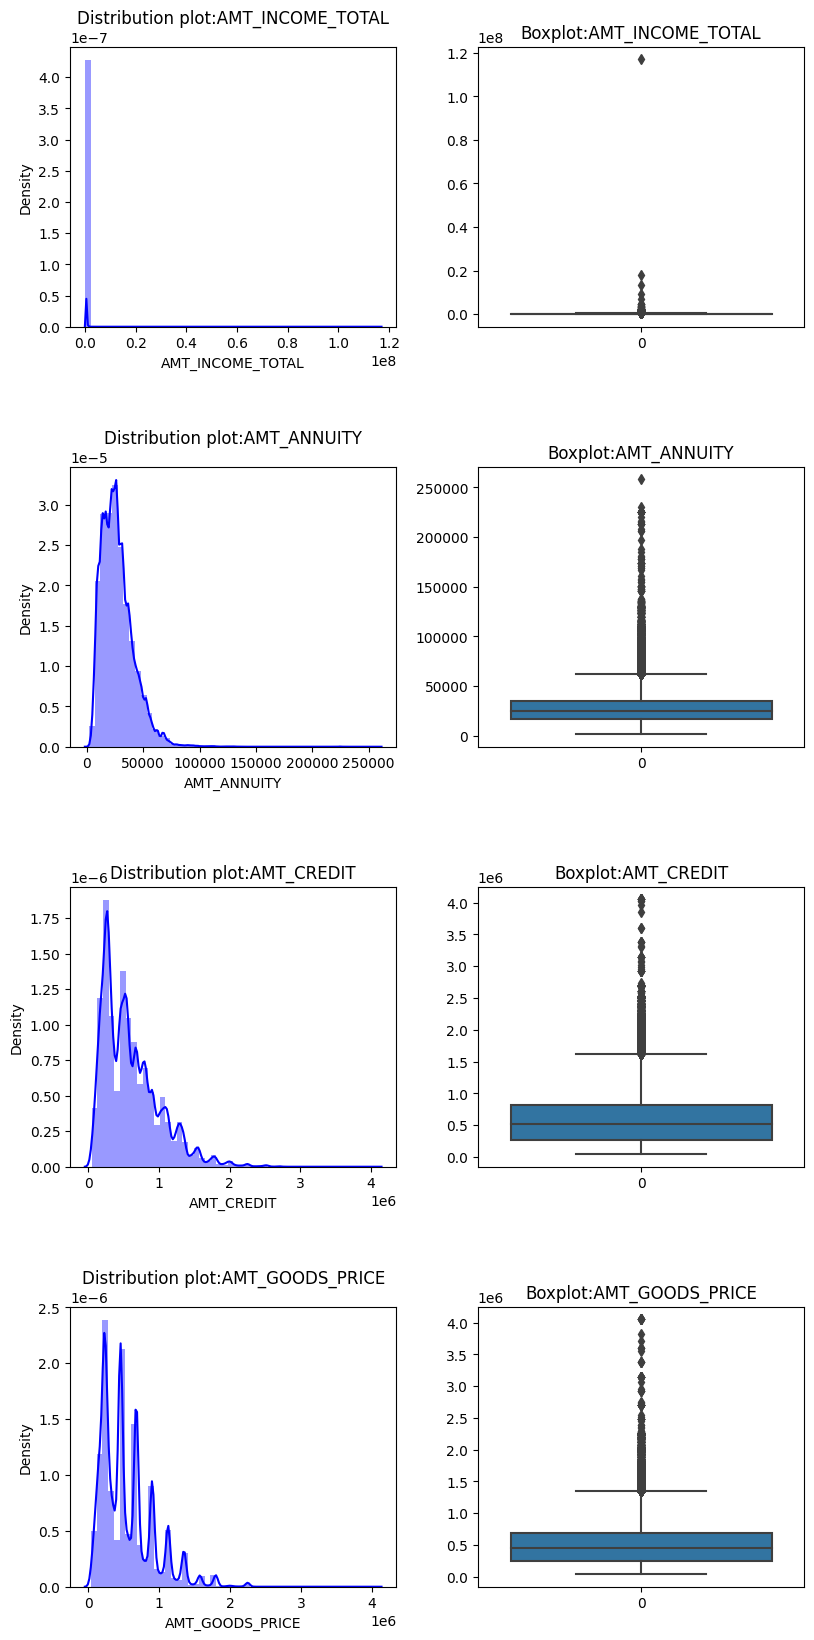

In [ ]:
import matplotlib.gridspec as gridspec
G = gridspec.GridSpec(4, 4)
G.update(wspace=0.25, hspace=0.5)
plt.figure(figsize = (20,20))
axes_l = []
numeric_cols = ["AMT_INCOME_TOTAL", "AMT_ANNUITY", "AMT_CREDIT", "AMT_GOODS_PRICE"]
row_index = 0
col_index = 0
axes_count = 0
for i, col in enumerate(numeric_cols):
    #Plotting distribution plot
    row_index = i
    axes_l.append(plt.subplot(G[row_index, col_index]))
    if train_df[col].isnull().sum() == 0:
        sns.distplot(train_df[col], color = 'blue', ax = axes_l[axes_count])
    else:
        sns.distplot(train_df[col].dropna(), color = 'blue', ax = axes_l[axes_count])
    plt.title('Distribution plot:'+col)

    axes_count+=1
    col_index+=1
    #Plotting boxplot
    axes_l.append(plt.subplot(G[row_index, col_index]))
    if train_df[col].isnull().sum() == 0:
        sns.boxplot(train_df[col], ax = axes_l[axes_count])
    else:
        sns.boxplot(train_df[col].dropna(), ax = axes_l[axes_count])
    plt.title('Boxplot:'+col)

    axes_count += 1
    col_index = 0

# axes_l
plt.show()

dari hasil tersebut diketahui bahwa
- mayoritas distribusi cenderung mengarah pada right skewed
- kolom ammount credit dan ammount good price punya kesamaan distribusi

In [ ]:
#cek korelasi dari ammount good price dan ammount credit
train_df[['AMT_GOODS_PRICE', 'AMT_CREDIT']].corr()

,AMT_GOODS_PRICE,AMT_CREDIT
AMT_GOODS_PRICE,1.00,0.99
AMT_CREDIT,0.99,1.00


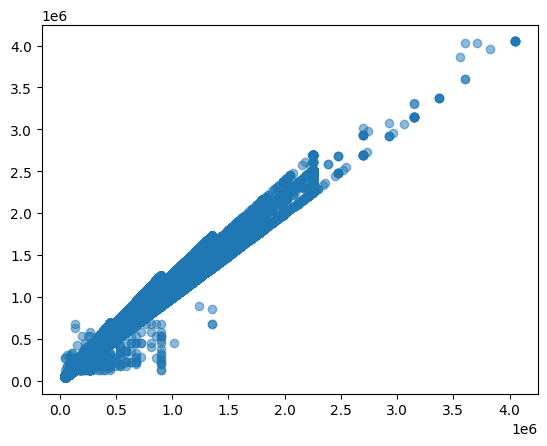

In [ ]:
#cek korelasi dari ammount good price dan ammount credit menggunakan scatter plot
plt.scatter(x = train_df['AMT_GOODS_PRICE'], y = train_df['AMT_CREDIT'], alpha=0.5)
plt.show()

dari analisis diketahui 2 kolom tersebut memiliki korelasi yang tinggi

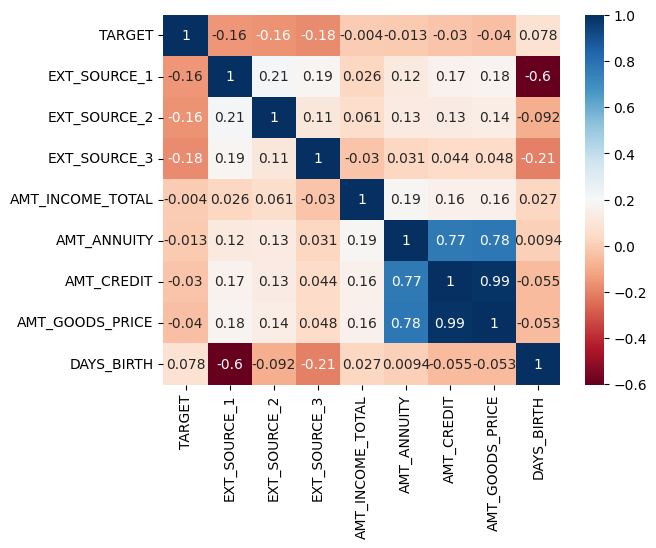

In [ ]:
corr_mat=train_df[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE','DAYS_BIRTH']].corr()
sns.heatmap(corr_mat, annot=True, cmap='RdBu')
plt.show()

dari data tersebut diketahui
- ammount credit dan ammount good price punya korelasi yang kuat
- days birth dan ext source 1 punya korelasi yang kuat
- days birth dan ext source 3 punya korelasi yang kuat
- sedangkan jika dilihat berdasarkan target, kolom Days_birth dan EXT_Source 3 memiliki korelasi yang kuat

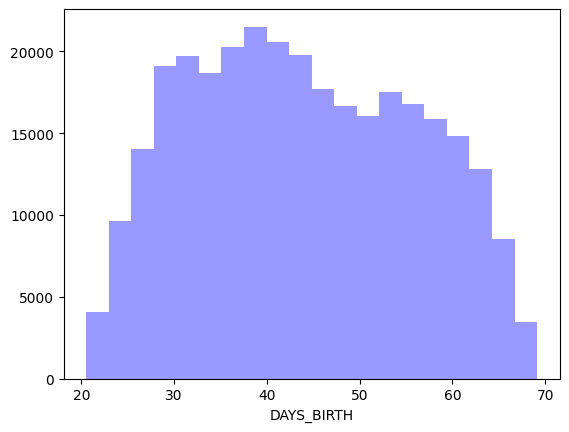

In [ ]:
#cek distribusi client's age
fig, ax = plt.subplots()
sns.distplot(train_df["DAYS_BIRTH"].abs()/365, color = 'blue', bins=20, kde=False, norm_hist=False)
plt.show()

Text(0.5, 1.0, 'distribution of age')

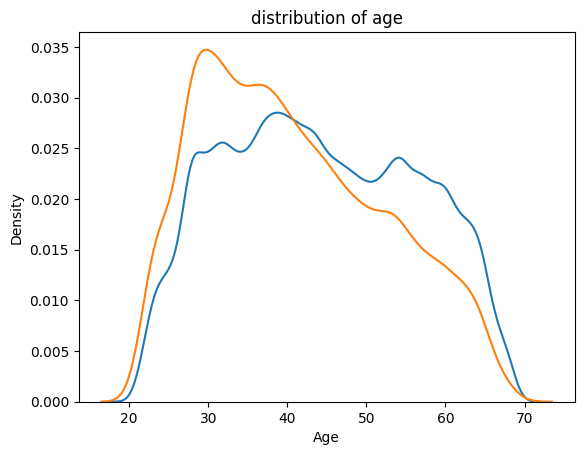

In [ ]:
#cek distribusi umur client berdasarkan target
sns.kdeplot(train_df.loc[train_df['TARGET']==0, 'DAYS_BIRTH'].abs()/365, label='target == 0')
sns.kdeplot(train_df.loc[train_df['TARGET']==1,'DAYS_BIRTH'].abs()/365, label='target == 1')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('distribution of age')

Dari hasil tsb diketahui bahwa orang yang berusia lebih muda cenderung tidak bisa membayar kembali pinjamannya

In [ ]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = train_df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # hitung persentase target=1 berdasarkan masing-masing column
    cat_perc = train_df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1, palette="Set2")

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc, palette="Set2")

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

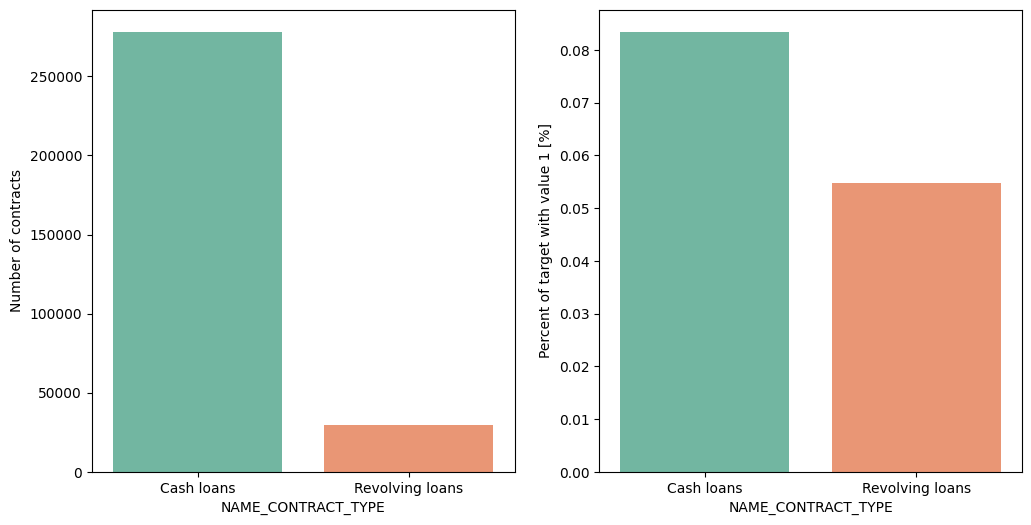

In [ ]:
# lihat distribusi pada kolom jenis pinjaman
plot_stats('NAME_CONTRACT_TYPE')

Dari hasil tersebut diketahui
- mayoritas pinjaman yang diambil pelanggan yakni cash loan
- sebanyak 8.35% pelanggan yang mengambil pinjaman dengan tipe cash load memiliki kesulitan dalam membayar kembali pinjamannya

In [ ]:
# lihat probabilitas kemampuan pembayaran kredit
pd.DataFrame(train_df.groupby(['CODE_GENDER','TARGET']).count()['SK_ID_CURR']).reset_index()

,CODE_GENDER,TARGET,SK_ID_CURR
0,F,0,188278
1,F,1,14170
2,M,0,94404
3,M,1,10655
4,XNA,0,4


In [ ]:
# lihat probabilitas kemampuan pembayaran kredit
print("probability that an applicant will repay the given that he is a male P(R|M): 73260/(73260+8576) = 0.8952")
print("probability that an applicant will repay the given that she is a female P(R|F): 119311/(119311+9971) = 0.9228")

probability that an applicant will repay the given that he is a male P(R|M): 73260/(73260+8576) = 0.8952
probability that an applicant will repay the given that she is a female P(R|F): 119311/(119311+9971) = 0.9228


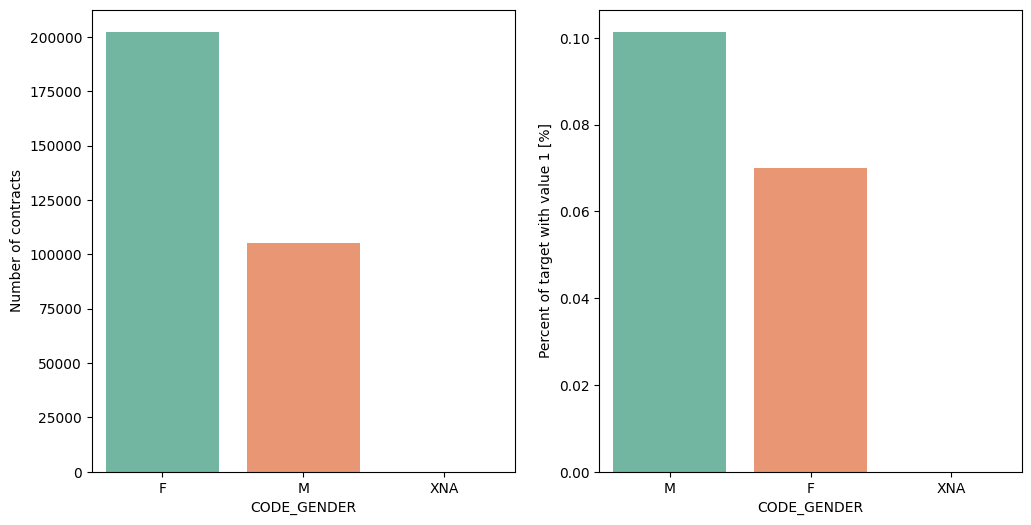

In [ ]:
# lihat distribusi Gender
plot_stats('CODE_GENDER')

berdasarkan hasil tsb diketahui :
- populasi wanita yang mengajukan kredit lebih besar dibandingkan pria
- pria mempunyai tingkat risiko gagal bayar kredit lebih tinggi dengan probabilitas sebesar 0.89

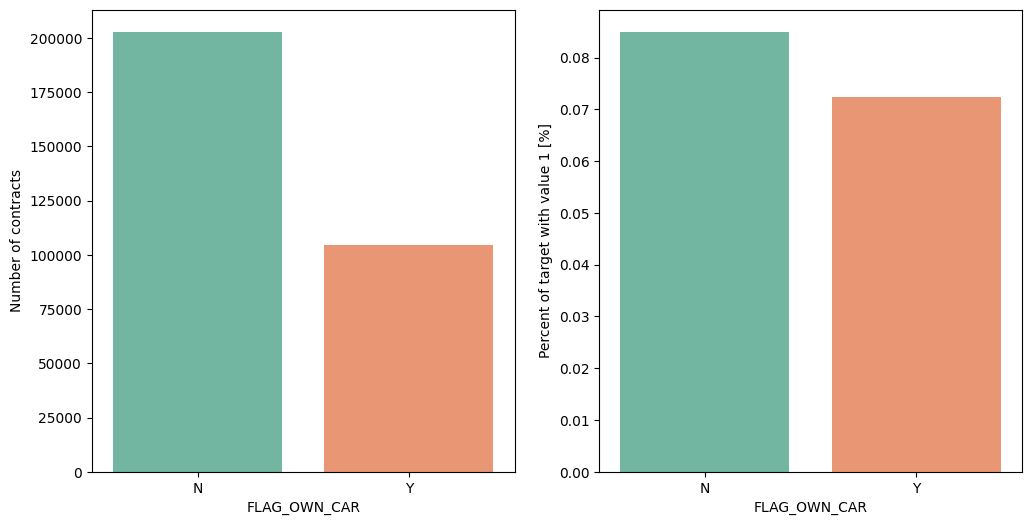

In [ ]:
# kemampuan kredit berdasarkan kepemilikan mobil
plot_stats('FLAG_OWN_CAR')

Dari hasil tersebut diketahui:
- mayoritas klien memiliki mobil
- berdasarkan kemampuan membayar kredit, klien yang memiliki mobil dengan client yang tidak memiliki punya tingkat risiko gagal bayar yang tinggi

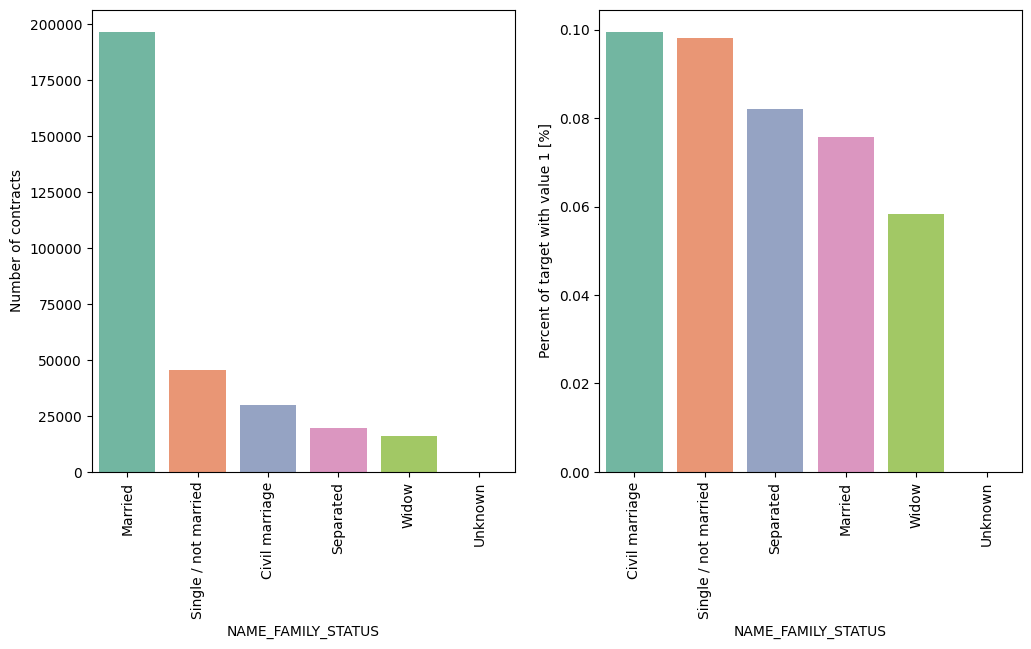

In [ ]:
# kemampuan kredit berdasarkan status keluarga
plot_stats('NAME_FAMILY_STATUS',True, True)

dari grafik tsb diketahui:
- orang dengan status married lebih banyak mengajukan pinjaman, disusul oleh single, civil marriage
- orang dengan status civil marriage memiliki lebih banyak kesulitan dalam membayar kredit

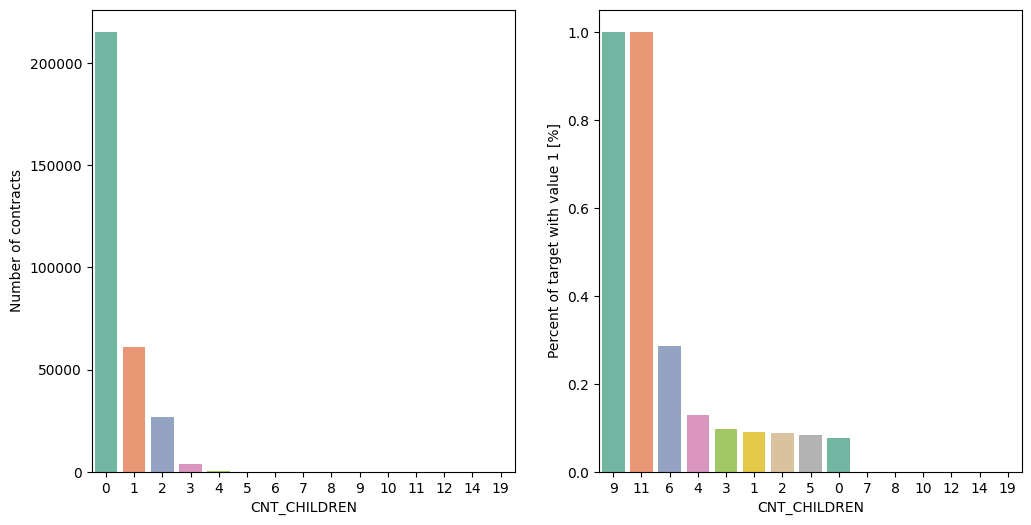

In [ ]:
# kemampuan kredit berdasarkan banyaknya anak
plot_stats('CNT_CHILDREN')

dari hasil tersebut diketahui:
- Sebagian besar klien yang mengambil pinjaman tidak memiliki anak.

- Untuk kemampuan membayar pinjaman, klien tanpa anak (0), 1, 2, 3, dan 5 anak memiliki persentase gagal bayar kredit rata-rata sekitar (10%). Klien dengan 4 dan 6 anak berada di atas rata-rata dalam hal persentase pinjaman yang tidak dibayar kembali (lebih dari 25% untuk keluarga dengan 6 anak).

- Sedangkan untuk klien dengan 9 atau 11 anak, persentase gagal bayar pinjaman yakni sebesar100%.

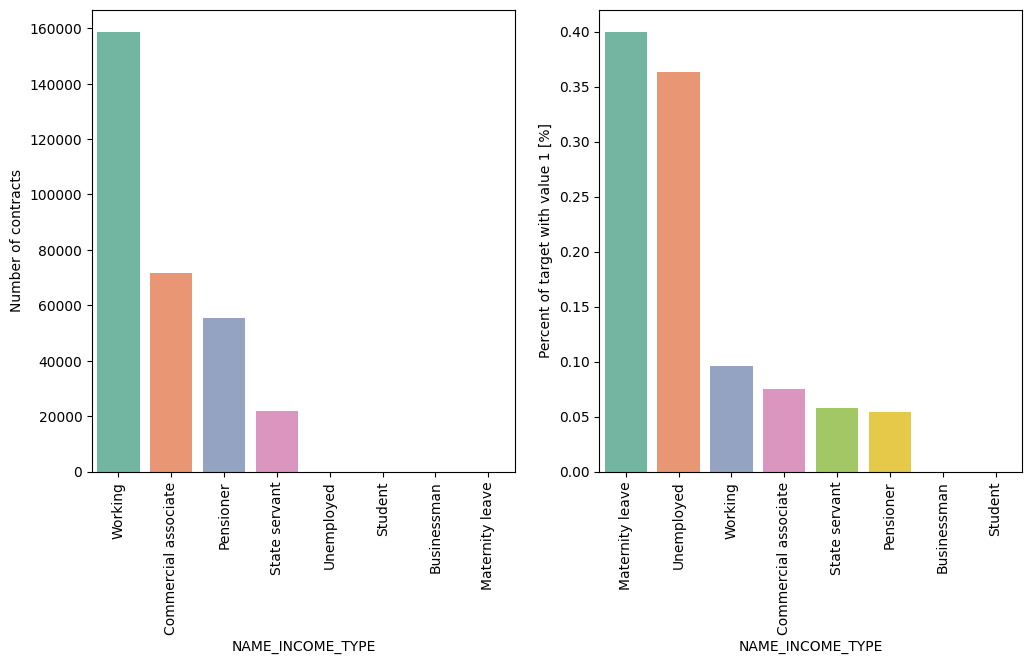

In [ ]:
# kemampuan kredit berdasarkan tipe income
plot_stats('NAME_INCOME_TYPE',True,True)

dari hasil tersebut diketahui:
- sebagian besar yang mengajukan pinjaman yakni orang yang mempunyai penghasilan dari bekerja
- pelanggan dengan status maternity leave mempunyai tingkat gagal bayar kredit yang lebih tinggi 40% kemudian diikuti pelanggan dengan status umemployed sebesar 37%.
- adapun itu pelanggan dengan status lainnya hanya memiliki risiko gagal bayar di bawah 10%

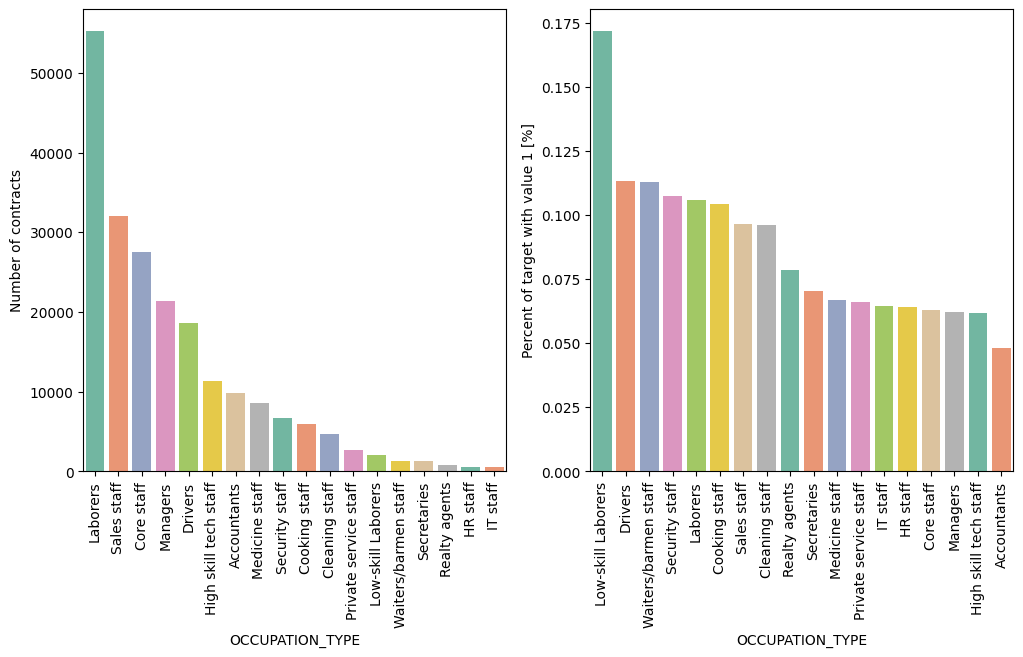

In [ ]:
# kemampuan kredit berdasarkan pekerjaan
plot_stats('OCCUPATION_TYPE',True, True)

dari hasil tersebut diketahui:
- orang yang mengajukan pinjaman mayoritas adalah laborers
- jika dilihat dari kemampuan membayar kembali pinjamannya, maka orang dengan status pekerjaan low skill laborers mempunyai tingkat gagal bayar yang lebih tinggi dibanding yang lainnya

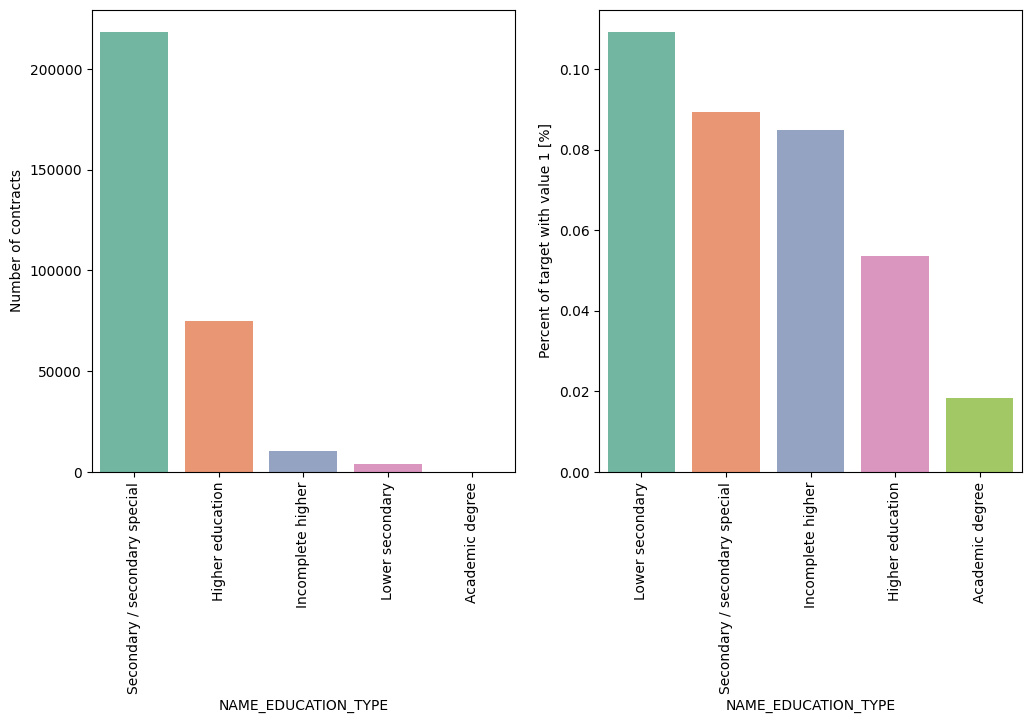

In [ ]:
# kemampuan kredit berdasarkan education
plot_stats('NAME_EDUCATION_TYPE',True)

dari hasil tersebut diketahui:
- orang yang memiliki status pendidikan lower secondary cenderung mempunyai risiko gagal bayar kredit dengan tingkat persentasi sebesar 12%

#PREPARATION

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

In [ ]:
# Load dataset
train_df=pd.read_csv('/content/drive/MyDrive/Zenius/FinPro/dataset/application_train.csv')
test_df=pd.read_csv('/content/drive/MyDrive/Zenius/FinPro/dataset/application_test.csv')

##Cek data duplikasi dan null

In [ ]:
# Disini kami ingin melihat ada tidaknya data duplikat pada dataset yang kami miliki
train_df.duplicated().sum()

0

In [ ]:
# Melihat bentuk kolom numierical yang memiliki nilai null
train_df[list(train_df.columns[train_df.isnull().any()])].shape

(307511, 67)

<Axes: >

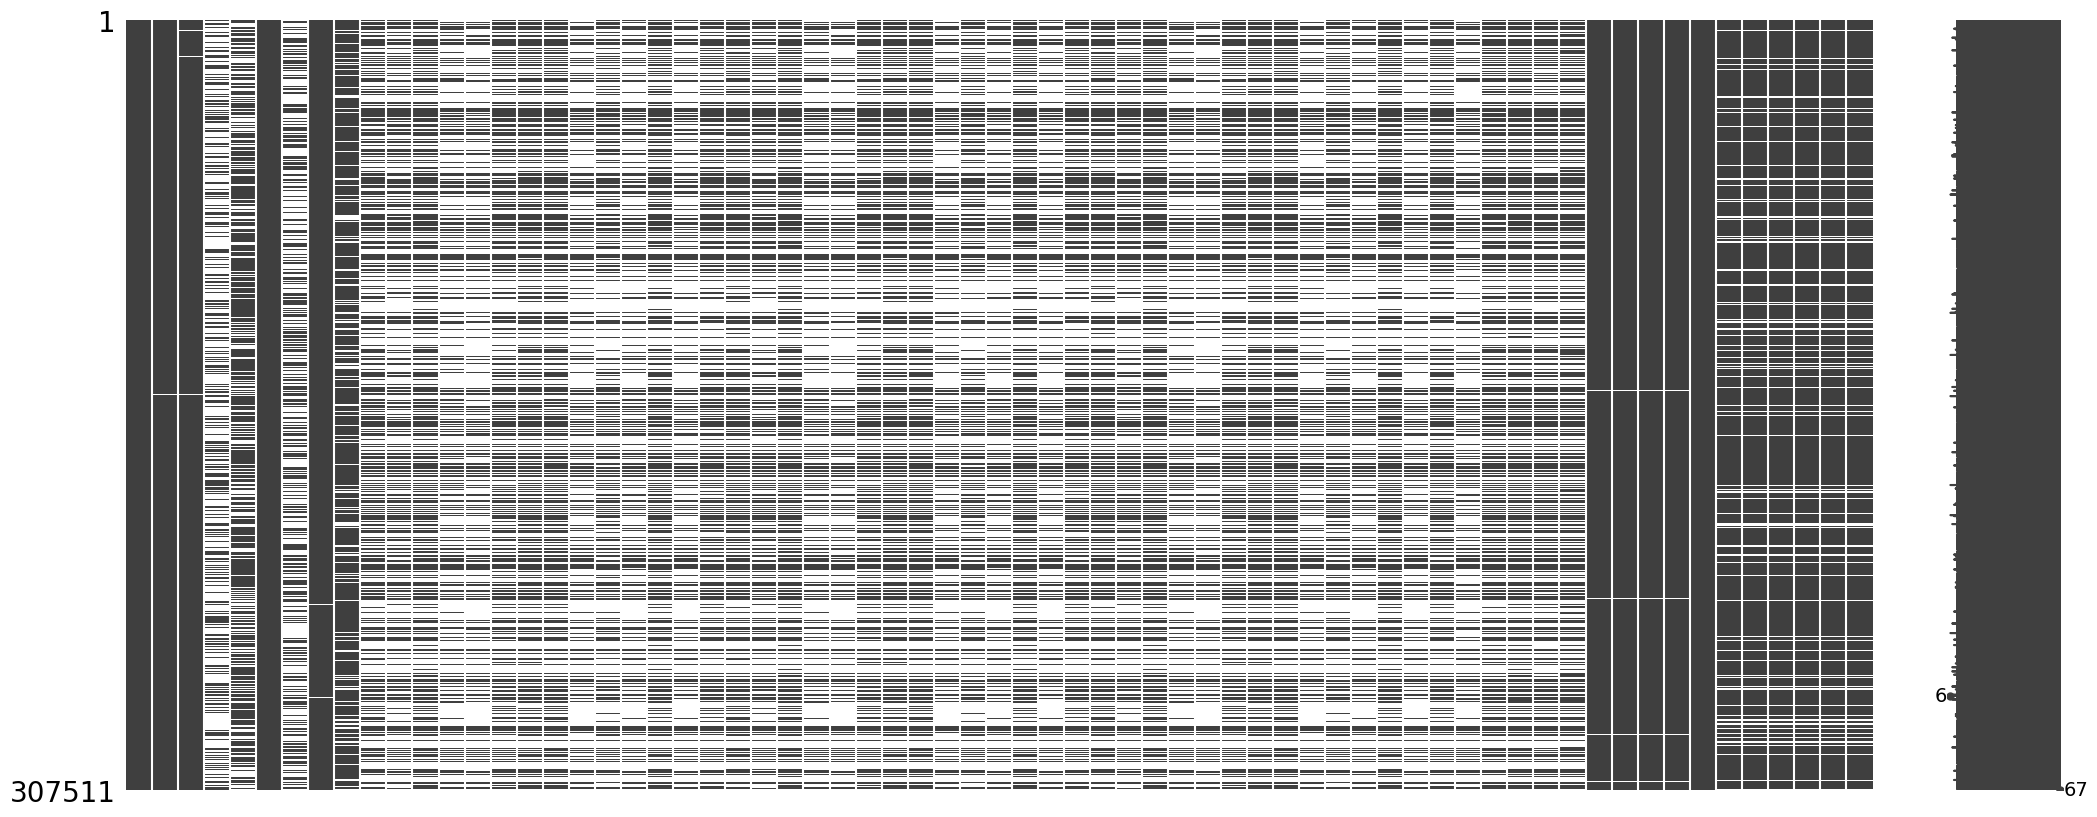

In [ ]:
# Kami menggunakan matrix untuk melihat gambaran yang null
msno.matrix(train_df[list(train_df.columns[train_df.isnull().any()])])

<Axes: >

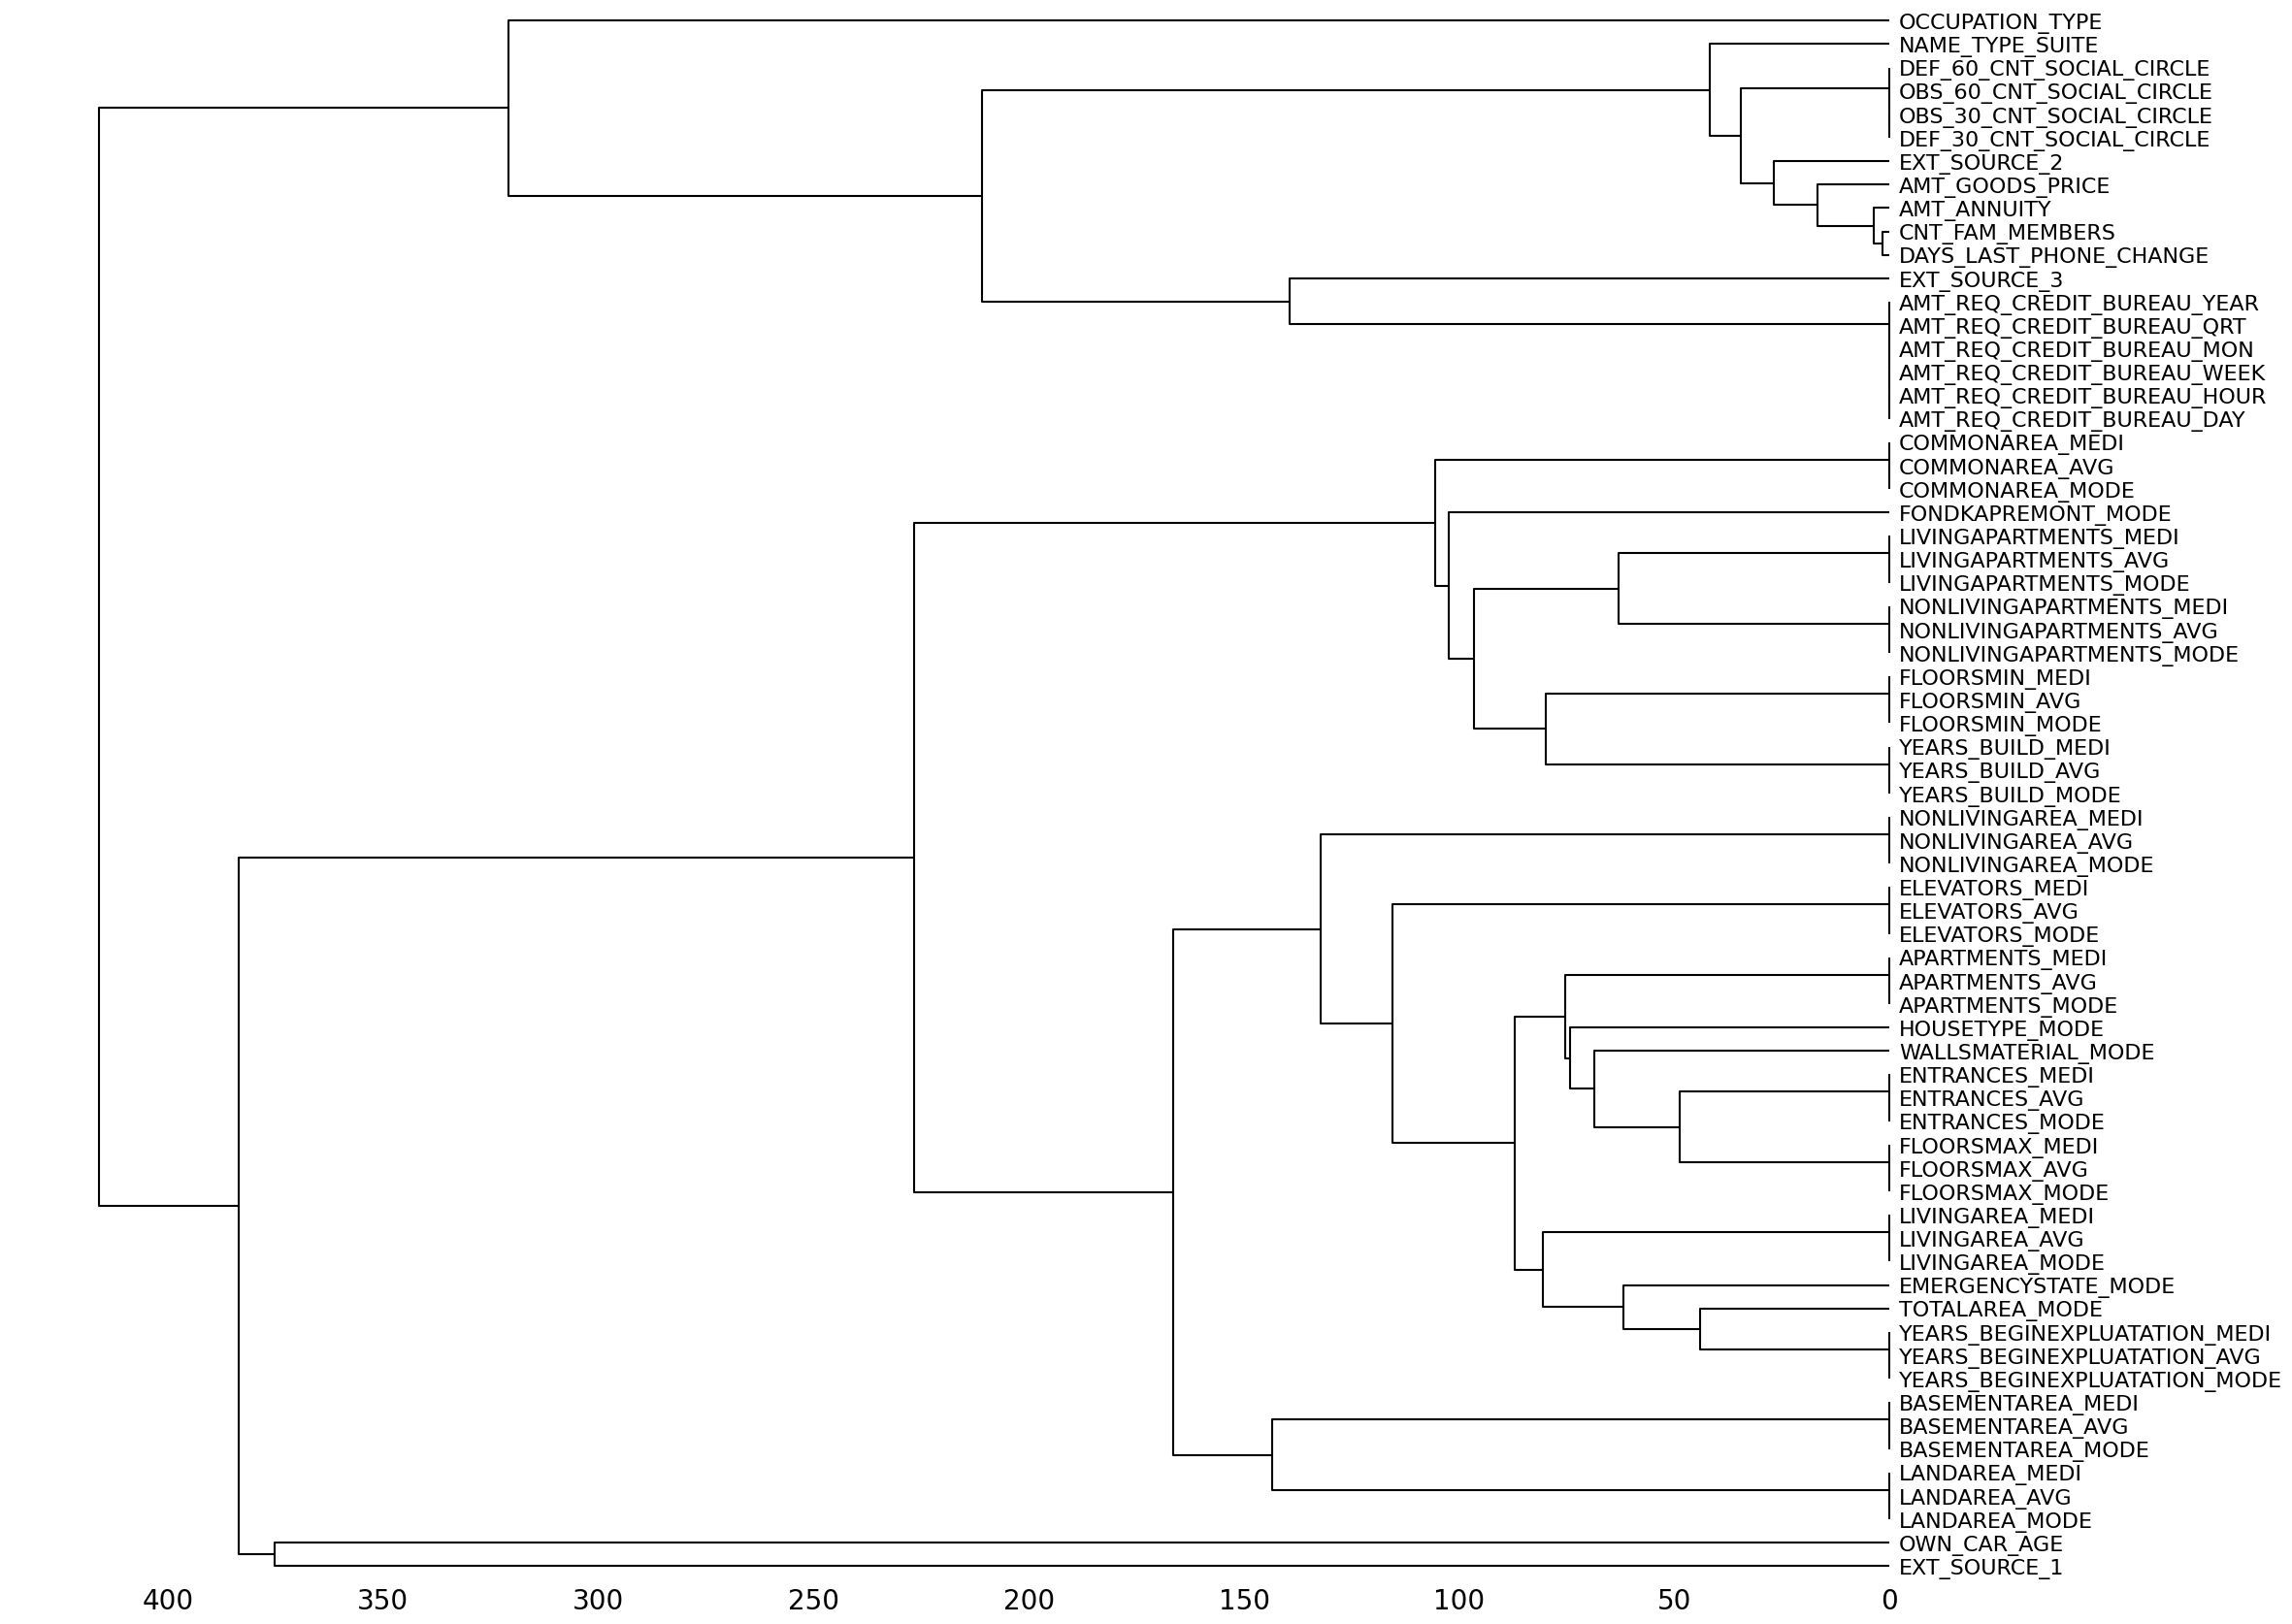

In [ ]:
# Dari visualisasi matrix diatas bisa dilihat kalau ada pola yang dimiliki nilai null jadi kami menggunakan dendrogram
# untuk melihat pola null pada dataset yang karena hal itu kami juga bisa melihat relasi kolom null dengan kolom lainnya
msno.dendrogram(train_df[list(train_df.columns[train_df.isnull().any()])])

In [ ]:
# Membagi kolom berdasarkan tipe data categrical dan numeric
cats=[i for i in train_df.columns if train_df[i].dtypes == 'O']
nums=[i for i in train_df.columns if train_df[i].dtypes != 'O'and i not in ['TARGET','SK_ID_CURR']]

##Melakukan Imputasi

>Untuk kolom yang bertipe numerical kami menggunakan imputasi -1 agar algoritma mengetahui kalau itu adalah memang nilai null tanpa asumsi kalau data tersebut hasusnya terisi<br>
>Untuk kolom yang bertipe kategorical kami menggunakan one-hot encoding dan dibantu dengan feature inquiry dengan threshold 10%

In [ ]:
# Imputasi menggunakan fillna dengan nilai -1, agar menindikasikan kepada algoritma kalau nilainya itu null
train_df[nums]=train_df[nums].fillna(-1)
test_df[nums]=test_df[nums].fillna(-1)

In [ ]:
# Mengidentifikasi kategori dalam setiap kolom yang muncul <=10%
small_categories = {}
for col in train_df[list(train_df[cats].columns[train_df[cats].isnull().any()])].columns:
    category_counts = train_df[col].value_counts(normalize=True)
    small_categories[col] = [category for category in category_counts.index if category_counts[category] <= 0.1]

# Menggabungkan kategori dengan frekuensi muncul <=10% menjadi "Rare" untuk setiap kolom
for col in train_df[list(train_df[cats].columns[train_df[cats].isnull().any()])].columns:
    for category in small_categories[col]:
        train_df[col] = train_df[col].replace(category, 'Rare')

In [ ]:
# Mengidentifikasi kategori dalam setiap kolom yang muncul <=10%
small_categories_test = {}
for col in test_df[list(test_df[cats].columns[test_df[cats].isnull().any()])].columns:
    category_counts = test_df[col].value_counts(normalize=True)
    small_categories_test[col] = [category for category in category_counts.index if category_counts[category] <= 0.1]

# Menggabungkan kategori dengan frekuensi muncul <=10% menjadi "Rare" untuk setiap kolom
for col in test_df[list(test_df[cats].columns[test_df[cats].isnull().any()])].columns:
    for category in small_categories_test[col]:
        test_df[col] = test_df[col].replace(category, 'Rare')

In [ ]:
# Melakukan one-hot encoding untuk data categorical untuk merubah categorical menjadi numerik dan menghilangkan nilai null
train_df_cats_dummy=pd.get_dummies(train_df[cats])
test_df_cats_dummy=pd.get_dummies(test_df[cats])

In [ ]:
# Melihat kolom apa saja yang berbeda antara data train dan test
kolom_berbeda = set(train_df_cats_dummy.columns) ^ set(test_df_cats_dummy.columns)
print(list(kolom_berbeda))

['NAME_FAMILY_STATUS_Unknown', 'NAME_INCOME_TYPE_Maternity leave', 'CODE_GENDER_XNA']


In [ ]:
# Menghapus kolom yang berbeda agar bisa digunakan untuk modeling
train_df_cats_dummy=train_df_cats_dummy.drop(list(kolom_berbeda),axis=1)

In [ ]:
# Melakukan cek bentuk dataframe
print('Bentuk dataframe train_df_cats_dummy\t : ',train_df_cats_dummy.shape)
print('Bentuk dataframe df_test_cats_dummy\t : ',test_df_cats_dummy.shape)

Bentuk dataframe train_df_cats_dummy	 :  (307511, 114)
Bentuk dataframe df_test_cats_dummy	 :  (48744, 114)


In [ ]:
# Menggabungkan kembali dataset yang terpisah untuk dilakukan modeling nantinya
train_df_merge=pd.merge(train_df[nums],train_df_cats_dummy,left_index=True,right_index=True,how='outer')
test_df_merge=pd.merge(test_df[nums],test_df_cats_dummy,left_index=True,right_index=True,how='outer')

In [ ]:
# Melakukan cek bentuk dataframe
print('Bentuk dataframe train_df_cats_dummy\t : ',train_df_merge.shape)
print('Bentuk dataframe test_df_cats_dummy\t : ',test_df_merge.shape)

Bentuk dataframe train_df_cats_dummy	 :  (307511, 218)
Bentuk dataframe test_df_cats_dummy	 :  (48744, 218)


In [ ]:
persen=(len(train_df[train_df['TARGET'].values==0])/len(train_df_merge))*100
persen

91.92711805431351

##Resampling

>Resampling di awal bertujuan untuk membagi label dengan jumlah yang sama agar hasil prediksi tidak cenderung ke salah satu label

In [ ]:
from imblearn.under_sampling import NearMiss

X = train_df_merge.values
y = train_df['TARGET'].values

# Menginisialisasi objek RandomUnderSampler
nearmiss = NearMiss(version=3)

# Melakukan Random Under-Sampling pada data
X_resampled, y_resampled = nearmiss.fit_resample(X, y)

# Menampilkan jumlah sampel setelah under-sampling
print("Jumlah sampel setelah under-sampling:")
print(pd.Series(y_resampled).value_counts())

Jumlah sampel setelah under-sampling:
0    24825
1    24825
dtype: int64


#MODELLING

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import time

# Pembagian data X dan y
X = X_resampled
y = y_resampled

# Membagi data menjadi set train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Metrik evaluasi yang sering digunakan
results = {}

In [ ]:
# Naive Bayes
start_time = time.time()
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
predictions_nb = naive_bayes.predict(X_test)
execution_time = time.time() - start_time
results['Naive Bayes'] = {
    'Accuracy':accuracy_score(y_test, predictions_nb),
    'Precision':precision_score(y_test, predictions_nb),
    'Recall':recall_score(y_test, predictions_nb),
    'F1-Score':f1_score(y_test, predictions_nb),
    'AUC-ROC':roc_auc_score(y_test, predictions_nb),
    'Confusion Matrix': confusion_matrix(y_test, predictions_nb),
    'Execution Time': execution_time
}
print('Classification Report:\n', classification_report(y_test, predictions_nb))
print('Accuracy Score:', accuracy_score(y_test, predictions_nb))

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.85      0.66      4965
           1       0.66      0.28      0.39      4965

    accuracy                           0.57      9930
   macro avg       0.60      0.57      0.53      9930
weighted avg       0.60      0.57      0.53      9930

Accuracy Score: 0.5656596173212487


In [ ]:
# Decision Tree
start_time = time.time()
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predictions_dt = decision_tree.predict(X_test)
execution_time = time.time() - start_time
results['Decision Tree'] = {
    'Accuracy':accuracy_score(y_test, predictions_dt),
    'Precision':precision_score(y_test, predictions_dt),
    'Recall':recall_score(y_test, predictions_dt),
    'F1-Score':f1_score(y_test, predictions_dt),
    'AUC-ROC':roc_auc_score(y_test, predictions_dt),
    'Confusion Matrix': confusion_matrix(y_test, predictions_dt),
    'Execution Time': execution_time
}
print('Classification Report:\n', classification_report(y_test, predictions_dt))
print('Accuracy Score:', accuracy_score(y_test, predictions_dt))

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.61      0.62      4965
           1       0.62      0.63      0.63      4965

    accuracy                           0.62      9930
   macro avg       0.62      0.62      0.62      9930
weighted avg       0.62      0.62      0.62      9930

Accuracy Score: 0.6203423967774421


In [ ]:
# Random Forest
start_time = time.time()
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
predictions_rf = random_forest.predict(X_test)
execution_time = time.time() - start_time
results['Random Forest'] = {
    'Accuracy':accuracy_score(y_test, predictions_rf),
    'Precision':precision_score(y_test, predictions_rf),
    'Recall':recall_score(y_test, predictions_rf),
    'F1-Score':f1_score(y_test, predictions_rf),
    'AUC-ROC':roc_auc_score(y_test, predictions_rf),
    'Confusion Matrix': confusion_matrix(y_test, predictions_rf),
    'Execution Time': execution_time
}
print('Classification Report:\n', classification_report(y_test, predictions_rf))
print('Accuracy Score:', accuracy_score(y_test, predictions_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70      4965
           1       0.70      0.68      0.69      4965

    accuracy                           0.69      9930
   macro avg       0.69      0.69      0.69      9930
weighted avg       0.69      0.69      0.69      9930

Accuracy Score: 0.694159113796576


In [ ]:
# Gradient Boosting
start_time = time.time()
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
predictions_gb = gradient_boosting.predict(X_test)
execution_time = time.time() - start_time
results['Gradient Boosting'] = {
    'Accuracy':accuracy_score(y_test, predictions_gb),
    'Precision':precision_score(y_test, predictions_gb),
    'Recall':recall_score(y_test, predictions_gb),
    'F1-Score':f1_score(y_test, predictions_gb),
    'AUC-ROC':roc_auc_score(y_test, predictions_gb),
    'Confusion Matrix': confusion_matrix(y_test, predictions_gb),
    'Execution Time': execution_time
}
print('Classification Report:\n', classification_report(y_test, predictions_gb))
print('Accuracy Score:', accuracy_score(y_test, predictions_gb))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.73      4965
           1       0.73      0.72      0.72      4965

    accuracy                           0.73      9930
   macro avg       0.73      0.73      0.73      9930
weighted avg       0.73      0.73      0.73      9930

Accuracy Score: 0.7255790533736153


In [ ]:
# k-Nearest Neighbors (k-NN)
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)
execution_time = time.time() - start_time
results['k-Nearest Neighbors (k-NN)'] = {
    'Accuracy':accuracy_score(y_test, predictions_knn),
    'Precision':precision_score(y_test, predictions_knn),
    'Recall':recall_score(y_test, predictions_knn),
    'F1-Score':f1_score(y_test, predictions_knn),
    'AUC-ROC':roc_auc_score(y_test, predictions_knn),
    'Confusion Matrix': confusion_matrix(y_test, predictions_knn),
    'Execution Time': execution_time
}
print('Classification Report:\n', classification_report(y_test, predictions_knn))
print('Accuracy Score:', accuracy_score(y_test, predictions_knn))

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.71      0.68      4965
           1       0.68      0.61      0.64      4965

    accuracy                           0.66      9930
   macro avg       0.66      0.66      0.66      9930
weighted avg       0.66      0.66      0.66      9930

Accuracy Score: 0.6587109768378651


#EVALUATION

In [ ]:
# Membuat DataFrame untuk hasil metrik hasil resample 1
df_results = pd.DataFrame(results)
df_results.T

,Accuracy,Precision,Recall,F1-Score,AUC-ROC,Confusion Matrix,Execution Time
Naive Bayes,0.57,0.66,0.28,0.39,0.57,"[[4245, 720], [3593, 1372]]",0.18
Decision Tree,0.62,0.62,0.63,0.63,0.62,"[[3013, 1952], [1818, 3147]]",3.68
Random Forest,0.69,0.70,0.68,0.69,0.69,"[[3540, 1425], [1612, 3353]]",17.09
Gradient Boosting,0.73,0.73,0.72,0.72,0.73,"[[3625, 1340], [1385, 3580]]",70.99
k-Nearest Neighbors (k-NN),0.66,0.68,0.61,0.64,0.66,"[[3526, 1439], [1950, 3015]]",6.91


Data train dan test pada model Gradient Boosting memiliki nilai performa yang paling baik dalam memprediksi serta memiliki nilai yang tidak jauh berbeda sehingga menjadi Model Terbaik.

##AUC-ROC Curve

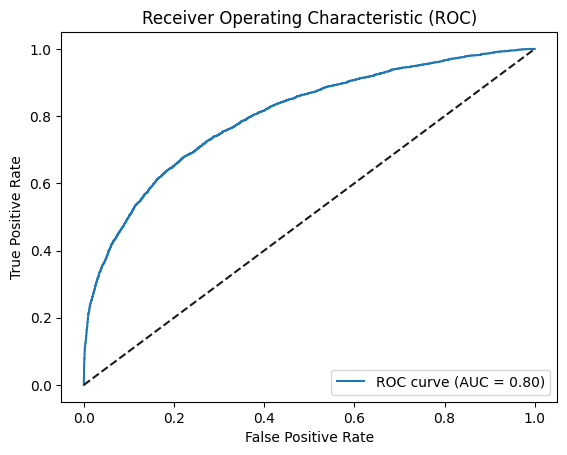

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Prediksi probabilitas kelas positif
y_pred_proba = gradient_boosting.predict_proba(X_test)[:, 1]

# Menghitung AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Membuat kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot kurva ROC
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--')  # Garis acak
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Kurva ROC memberikan gambaran visual tentang hubungan antara tingkat True Positive Rate (TPR) dan False Positive Rate (FPR) pada berbagai ambang batas (threshold) untuk klasifikasi model. Nilai AUC (Area Under the Curve) yang dihasilkan adalah 0.80. Dimana, semakin dekat kurva ROC dengan sudut kiri atas, semakin baik model dalam membedakan antara kelas positif dan negatif.

##Confusion Matrix

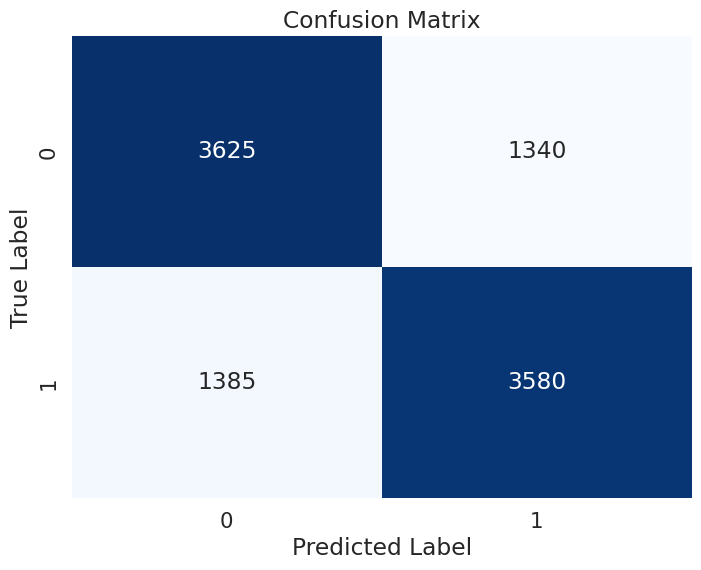

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix=confusion_matrix(y_test, predictions_gb)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

##Feature Importance

In [ ]:
pip install pandas sklearn dalex

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=90209619a9dd8e577a87371cc0eff4a2a75794c07b97da37ac56c606c172cc0d
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
  Created wheel for dalex: filename=dalex-1.6.0-py3-none-any.whl size=1046001 sha256=2b25062bb904d6d1ca6c0bd620b9f8c1f5e990c4c1c21b6bd6870597e98111e2
  Stored in directory: /root/.cache/pip/wheels/c8/45/19/f5810bf7c5ff9a476ebd89bb5b81a18ffcdf93931d17dbb0c1
Successfully built sklearn dalex


In [ ]:
import dalex as dx
import warnings
warnings.filterwarnings("ignore")

X_train=pd.DataFrame(X_train)
X_train.columns=list(train_df_merge.columns)
y_train=pd.DataFrame(y_train)

explainer = dx.Explainer(gradient_boosting, X_train, y_train)
model_parts = explainer.model_parts()
feature_importance = model_parts.result

# Menampilkan 10 fitur teratas beserta nilai kepentingannya
Top_10=feature_importance.head(10).sort_values(by='dropout_loss', ascending=False)
Bottom_10=feature_importance.head(10).sort_values(by='dropout_loss', ascending=True)

Preparation of a new explainer is initiated

  -> data              : 39720 rows 218 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 39720 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7fd073265ab0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0575, mean = 0.5, max = 0.975
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.931, mean = 7.68e-06, max = 0.933
  -> model_info        : package sklearn

A new explainer has been created!


In [ ]:
Top_10

In [ ]:
Bottom_10

In [ ]:
feature_importance

Variable AMT_GOODS_PRICE memiliki nilai droupout loss yang tinggi, yang mana artinya jika AMT_GOODS_PRICE menghilang maka akan sangat mempengaruhi hasil akurasi.

##EKSPERIMENT

>Jadi sebelumnya ada banyak sekali hal yang sudah dilakukan, namun yang sekarang ini adalah hasil paling optimal yang sudah kami coba. Eksperiment yang kami lakukan antara lain adalah:
1. Awalnya kami ingin menggunakan imputasi KNNImputer, namun ternyata proses fittingnya memakan waktu yang sangat lama bahkan membuat memori penuh dan reconnect sehingga harus ulang dari awal, jadi kami menggunakan imputasi -1 dengan alasan karena nilai null pada dataset itu disengaja sehingga -1 akan mengindikasikan kepada algoritma kalau itu adalah nilai null yang disengaja.
2. Awalnya kami menggunakan penghapusan baris dengan threshold kolom yang memiliki nilai null <=50% maka barisnya akan dihapus, ternyata itu adalah hal yang salah dikarenakan banyak yang berlabel 1 yang memiliki nilai null sehingga kami kehilangan sample label 1 sangat banyak dan membuat algoritma rusak, asumsi lain adalah dikarenakan jika dilihat nilai null setiap kolom itu memiliki keterikatan sehingga kami juga kehilangan variasi untuk label 0 dan 1. saat penghapusan ini kami sempat menggunakan 2 percobaan dikarekan percobaan pertama salah kode, hal ini tidak jadi di implementasikan dikarenakan sample menjadi tidak bervariasi diakibatkan banyak dari sample yang memiliki target minoritas banyak yang terhapus sehingga sample minoritas pun menjadi jauh lebih sedikit.
3. Kami juga sempat ingin menggunakan SMOTE di akhir, tetapi dikarenakan rasionya sudah 50:50 sehingga SMOTE tidak bekerja sama sekali, jadi kami hanya menggunakan undersampling nearmiss dengan parameter tambahan 'version=3' yang bertujuan untuk mengambil sample mayoritas terjauh dari minoritas sehingga hasil prediksi bisa lebih bervariasi saja.
4. Dari saran yang diberikan untuk menangani overfitting dengan cara feature rare sudah dilakukan namun tidak banyak mempengaruhi dan malah menjadi semakin buruk, alhasil kami tidak menggunakan feature rare dengan alasan agar lebih banyak pola pada setiap label sehingga akurasinya pun meningkat
5. Kami tidak menggunakan feature selection dikarenakan menurut kami semua kolom itu penting, setelah mengetahui bahwa kolom yang ada di application_train dan test itu adalah gabungan dari semua table yang ada dapat disimpulkan kalau yang di application_train dan test kemungkinan besar adalah kolom kolom yang penting dan memang ingin mereka prediksi.

##Kesimpulan Evaluasi

>mantap

#SUBMIT KAGGLE

>Algoritma yang memiliki hasil prediksi terbaik pada data train adalah algoritma Gradient Boosting dengan akurasi 72% dan recall 72%

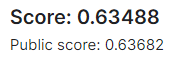

>Namun bisa dilihat bahwa saat digunakan untuk testing hanya berhasil sampai di 63%

>Hasil diatas memang tidak bisa dibilang tinggi dan dapat dipercaya dikarenakan beberapa hal, antara lain:
1. Kurangnya banyaknya sample dan fitur yang kami proses
2. Kurangnya pengetahuan tentang parameter yang sekiranya mampu membuat akurasi lebih baik
3. Kurangnya pengalaman dari kami <b>(PASTI!!)
